# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [38]:
# Libraries
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [3]:
# your code here
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 35th digit.

In [6]:
# your code here
X[35]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

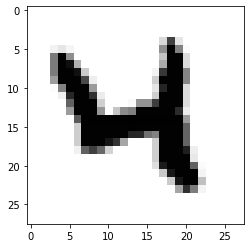

In [28]:
# your code here
number = X[20]
number_image = number.reshape(28, 28)
plt.imshow(number_image, cmap = plt.cm.binary, interpolation = "nearest")

#### Use indexing to see if what the plot shows matches with the outcome of the 35th index.

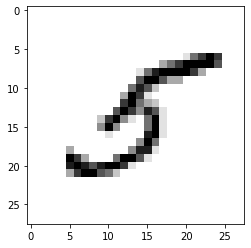

In [29]:
# your code here
number = X[35]
number_image = number.reshape(28, 28)
plt.imshow(number_image, cmap = plt.cm.binary, interpolation = "nearest")

In [65]:
y[35]

'5'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [74]:
# your code here
x_train = X[:60000]
x_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [92]:
y5_train = np.where(y_train == '5', 1, 0)
y5_test = np.where(y_test == '5', 1, 0)

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [93]:
# your code here
from sklearn.linear_model import LogisticRegression

mod5 = LogisticRegression().fit(x_train, y5_train)

C:\Users\Gareth\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Does the classifier predict correctly the 35th digit we picked before?

In [137]:
# your code here
y_pred_5 = mod5.predict(x_train)
print(y_pred[35])
print(y[35])

0
5


In [95]:
# 1 = True, 0 = False. Therefore, it is a correct prediction.

#### The 36000th value is a 9. Check if it was correctly predicted.

In [96]:
print(y_pred[36000])
print(y[36000])

0
9


In [ ]:
# It is trained to detect a 5, so it will not detect a 9.

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [99]:
# Libraries
from sklearn.base import BaseEstimator

In [100]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [108]:
never_5_clf.fit(x_train)
never_5_predict = never_5_clf.predict(x_test)

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [126]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, confusion_matrix = score(y5_test, never_5_predict)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('confusion matrix: {}'.format(confusion_matrix))

precision: [0.9108 0.    ]
recall: [1. 0.]
fscore: [0.95331798 0.        ]
confusion matrix: [9108  892]


C:\Users\Gareth\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
y_pred = mod5.predict(x_test)

In [128]:
precision, recall, fscore, confusion_matrix = score(y5_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('confusion matrix: {}'.format(confusion_matrix))

precision: [0.98398867 0.90964591]
recall: [0.99187527 0.83520179]
fscore: [0.98791623 0.87083577]
confusion matrix: [9108  892]


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [129]:
# The precision is better with the Logistic Regression model. 

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [142]:
# your code here
from sklearn import metrics 

metrics.roc_curve(y5_test, y_pred_5)

ValueError: Found input variables with inconsistent numbers of samples: [10000, 60000]

#### Now find the roc_auc_score for each. 

In [ ]:
# your code here

#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# your answer here